In [1]:
import pandas as pd

In [2]:
import insta as IG
insta = IG.Instagram()
insta.login()
insta.following()
insta.followers()

In [17]:
insta.get_photos()

100% [................................................................................] 3794 / 3794downloading photo:  greenieapp
100% [................................................................................] 3598 / 3598downloading photo:  okio.tkd
100% [................................................................................] 5078 / 5078downloading photo:  corentin_llc
100% [................................................................................] 7656 / 7656downloading photo:  sam.hickson
100% [................................................................................] 6130 / 6130downloading photo:  tammylafrance
100% [................................................................................] 4258 / 4258downloading photo:  suprisestore_oficial
100% [................................................................................] 2726 / 2726downloading photo:  creatiboticos
100% [...................................................................

In [3]:
follower = pd.read_pickle('follower.pickle')
follower.head(10)

,time_first,time_last,username,name,status,img
0,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,fotodobrasil_marcelovianna,FOTODOBRASIL🇧🇷,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/a4...
1,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,fernanda_pessanha,Fernanda Pessanha,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/5a...
2,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,hiphopmusicccf_28,Hip Hop Music,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/7f...
3,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,pratescarolina,Carolina Prates,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/a2...
4,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,maicon.paixao.58,Maicon Paixao,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/f2...
5,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,mexbeton,MexBetonبتن اکسپوز-مکس بتن‌,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/8e...
6,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,carolina.pb,,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/91...
7,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,official_sashadin,sashadin,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/ec...
8,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,infoeducausm,InfoEduca,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/d6...
9,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...


In [4]:
following = pd.read_pickle('following.pickle')
following.head(10)

,time_first,time_last,username,name,status,img
0,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,pycoders,Python Coders,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/25...
1,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,raquelchircop,Raquel Chircop,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
2,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,ai_machine_learning,Artificial intelligence,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/49...
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
4,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,raropizza,Raropizza,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/29...
5,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,wired,WIRED,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b3...
6,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,businessweek,Bloomberg Businessweek,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
7,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,begeporverde,begeporverde,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/fe...
8,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,rosyfranchipasquin,Rosy Franchi Pasquin,Seguindo,https://instagram.feoh3-1.fna.fbcdn.net/vp/688...
9,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,pedrocomarques,Pedro Marques,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/ab...


In [5]:
following_not_follower = [x for x in following['username'].values if x  not in follower['username'].values ]
print(following_not_follower)

['pycoders', 'raquelchircop', 'ai_machine_learning', 'chapolinsincero', 'raropizza', 'wired', 'businessweek', 'rosyfranchipasquin', 'cesarssalim', 'rick_de_moraes', 'vtbellini', 'danovaester', 'gemudinhas', 'cosmojoseroberto', 'wilson_svieira', 'lulubasile', 'joaopiresinsta', 'claudionegon', 'danyel.fonseca', 'leticiadiasverona', 'lunacostaol', 'atatipelomundo', 'marcella_blok', 'julianasfonseca', 'jonathanavis', 'andrebastos187', 'alfredoborgesp', 'drppacheco', 'cristianacamarate', 'mianafelipe', 'ernanisouzacosta', 'marcoaur.oficial', 'jineriebetancurt', 'ysdomingues', 'dra.chrisprado', 'showdajessica', 'matheusbo', '13allan', 'raquelflinker', 'bielo_m', 'beatriz.cabral.felicidade', 'seu_hulk', 'juliopitombo', 'leandrogrisoni', 'allinetblemos', 'mnrcruz85', 'wearedefcon', 'birinasdoguana', 'isphus1973', 'filipedeschamps', 'juliacfranco', 'robertobscosta', 'gavic37', 'psicologa_julianovaes', 'julipima', 'recreiocanoas', 'canoada_vila', 'pauloalvesromao', 'martal.borges', 'raspberrypif

In [6]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

172 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [7]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,291,291,291,291,291
Seguir,172,172,172,172,172
Solicitado,18,18,18,18,18


In [8]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [9]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
480,2019-08-01 15:11:28.303596,2019-08-01 15:11:28.303596,lenelessa_,Lene Lessa,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/714...
479,2019-08-01 15:11:28.303596,2019-08-01 15:11:28.303596,myllenaalmeidaterapias,Myllena Almeida - Terapias,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/59f...
478,2019-08-01 15:11:28.303596,2019-08-01 15:11:28.303596,fluminensedo_meu_coracao,Fluminense,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/145...
477,2019-08-01 15:11:28.303596,2019-08-01 15:11:28.303596,armansamimi_,Mr.AI,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/439...
476,2019-08-01 15:11:28.303596,2019-08-01 15:11:28.303596,marcellachreem,Marcella Chreem,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/04e...
475,2019-08-01 15:11:28.303596,2019-08-01 15:11:28.303596,domaarmazem,Doma Armazém,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/317...
470,2019-08-01 10:43:26.593775,2019-08-01 15:11:28.303596,laylasmendes,Layla Mendes,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/eb1...
465,2019-08-01 10:43:26.593775,2019-08-01 15:11:28.303596,greenieapp,Greenie,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/921...
466,2019-08-01 10:43:26.593775,2019-08-01 15:11:28.303596,okio.tkd,Okio Arte Marcial,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/66c...
468,2019-08-01 10:43:26.593775,2019-08-01 15:11:28.303596,sam.hickson,Sam Hickson,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1d0...


In [10]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
38,2019-07-29 22:30:54.216241,2019-08-01 10:43:26.593775,olivia.goodwill.fx,Olivia.Fx,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/24...


In [11]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
546,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,clarissa.rmedeiros,Clarissa Medeiros,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/7f1...
541,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,fabiocosta1959,Fabio Costa,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b39...
537,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,luisfurious,Luis Fernando,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/20f...
539,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,monicamansur,Monica Mansur,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a5b...
540,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,zvtavares,Zé Vitor Tavares,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/cbe...
538,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,pure.python,Pure Python,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/318...
542,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,dr.igorlucena,Dr Igor Lucena,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/979...
543,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,gutosenra,Guto Senra,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3ba...
544,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,vininight,VINI NIGHT,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/f6c...
545,2019-07-31 21:20:19.217161,2019-08-01 15:07:36.406600,tavarezy,João Tavares,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e5f...


In [12]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...


In [13]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [14]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
544,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
623,2019-07-30 10:29:44.220296,2019-08-01 15:07:36.406600,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-01 15:11:28.303596,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
197,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
48,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,_gabicabral,,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/d5...
323,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,_gustavoayala_,Gustavo Ayala,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/91...
68,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,_luizpinheiro,Luiz Felipe Pinheiro,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/2c...
166,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,_victoriazevedo,Victória Azevedo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/0f...
72,2019-07-29 22:30:54.216241,2019-08-01 15:11:28.303596,a19vm,41 72 73 61 6c 61 6e (Hex),Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c6...


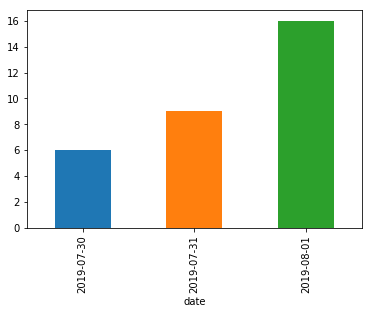

In [18]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[1:].plot(kind='bar')

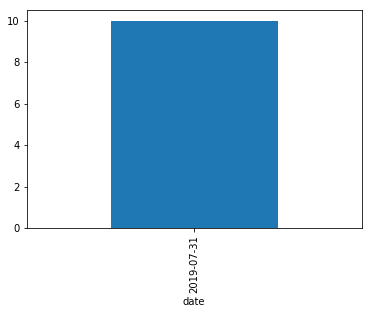

In [19]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')